In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

from quickclus import QuickClus

In [3]:
df = pd.read_csv("10000 Sales Records.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [4]:
to_drop = ["Order Date", "Order ID", "Ship Date"]

clf = QuickClus(random_state = 42, verbose = True)
clf.fit(df.drop(to_drop, axis = 1))

2022-04-06 12:52:33,890 - quickclus - INFO - No min_samples passed, using min_samples = min_cluster_size
2022-04-06 12:52:33,944 - quickclus - INFO - Extracting categorical features
2022-04-06 12:52:33,962 - quickclus - INFO - Preprocessing categorical features
2022-04-06 12:52:34,074 - quickclus - INFO - Transforming categorical features into UMAP
2022-04-06 12:52:34,076 - quickclus - INFO - Preprocessed categorical data shape: (10000, 21)
2022-04-06 12:53:53,653 - quickclus - INFO - Metric used for categorical data: jaccard
2022-04-06 12:53:53,661 - quickclus - INFO - Extracting numerical features
2022-04-06 12:53:53,664 - quickclus - INFO - Preprocessing categorical features
2022-04-06 12:53:53,855 - quickclus - INFO - Transforming numerical features into UMAP
2022-04-06 12:54:35,336 - quickclus - INFO - Mapping/Combining Embeddings
2022-04-06 12:54:35,339 - quickclus - INFO - Numerical data embedding shape: (10000, 2)
2022-04-06 12:54:35,342 - quickclus - INFO - Categorical data em

In [5]:
results = clf.assing_results(df)
results.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Cluster
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00,1
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50,3
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95,25
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,1
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06,3


In [6]:
results["Cluster"].unique().shape

(29,)

In [7]:
clf.cluster_summary(results.drop(to_drop, axis = 1), metric = "mean", include_cat = True)

,data_prop,data_count,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Region,Country,Item Type,Sales Channel,Order Priority
1,0.1712,1712,4939.875000,659.929334,513.501180,3.260112e+06,2.536443e+06,723669.138400,Europe,Nigeria,Household,Online,"[C, L]"
25,0.1285,1285,5162.571206,182.391673,105.293346,9.414862e+05,5.435216e+05,397964.543798,Europe,Seychelles,Cereal,Online,C
0,0.0888,888,4958.138514,81.730000,56.670000,4.052287e+05,2.809777e+05,124250.951149,Europe,Nepal,Personal Care,Online,H
2,0.0839,839,4983.616210,255.280000,159.420000,1.272218e+06,7.944881e+05,477729.449869,Sub-Saharan Africa,"[Somalia, United Arab Emirates]",Baby Food,Online,C
4,0.0798,798,4994.223058,421.890000,364.690000,2.107013e+06,1.821343e+06,285669.558897,Europe,"[Afghanistan, Comoros, France, Solomon Islands...",Meat,Offline,L
3,0.0782,782,5000.557545,47.450000,31.790000,2.372765e+05,1.589677e+05,78308.731151,Sub-Saharan Africa,Vatican City,Beverages,Online,M
-1,0.0724,724,4952.743094,170.228246,99.256160,8.366923e+05,4.895535e+05,347138.808135,Sub-Saharan Africa,"[Australia, Benin, United States of America]",Vegetables,Online,H
9,0.0704,704,5015.305398,109.280000,35.840000,5.480726e+05,1.797485e+05,368324.028409,Sub-Saharan Africa,Cambodia,Clothes,Offline,C
15,0.0596,596,4889.778523,437.200000,263.330000,2.137811e+06,1.287625e+06,850185.791879,Europe,Slovenia,Cosmetics,Online,C
19,0.0508,508,5097.657480,9.330000,6.920000,4.756114e+04,3.527579e+04,12285.354528,Sub-Saharan Africa,Djibouti,Fruits,Online,L


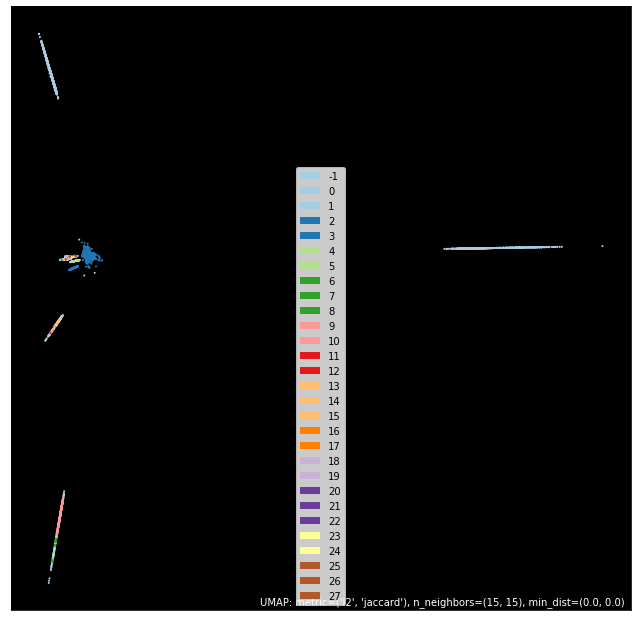

In [8]:
clf.plot_2d_labels()

In [22]:
min_prop = 0.02
max_prop = 0.25

clf.tune_model(n_trials = 100,
                min_cluster_start = min_prop,
                min_cluster_end = max_prop,
                min_samples_start = min_prop,
                min_samples_end = max_prop,
                max_epsilon = None)


[I 2022-04-06 13:03:07,976] A new study created in memory with name: no-name-697b1b89-a161-4f97-88dc-aced6bd67287
[I 2022-04-06 13:03:10,764] Trial 0 finished with value: 0.3476608043424746 and parameters: {'min_cluster': 673, 'min_samples': 664}. Best is trial 0 with value: 0.3476608043424746.
[I 2022-04-06 13:03:13,327] Trial 1 finished with value: 0.4200293228217605 and parameters: {'min_cluster': 420, 'min_samples': 888}. Best is trial 1 with value: 0.4200293228217605.
[I 2022-04-06 13:03:20,859] Trial 2 finished with value: 0.0 and parameters: {'min_cluster': 1901, 'min_samples': 2325}. Best is trial 1 with value: 0.4200293228217605.
[I 2022-04-06 13:03:24,203] Trial 3 finished with value: 0.4068358579618703 and parameters: {'min_cluster': 1182, 'min_samples': 1072}. Best is trial 1 with value: 0.4200293228217605.
[I 2022-04-06 13:03:26,633] Trial 4 finished with value: 0.45098819777078675 and parameters: {'min_cluster': 202, 'min_samples': 403}. Best is trial 4 with value: 0.4509

Best parameters:  {'min_cluster': 869, 'min_samples': 240}


QuickClus(min_samples=15, n_components=2, random_state=42, verbose=True)

In [23]:
results = clf.assing_results(df)

In [24]:
results["Cluster"].unique().shape

(4,)

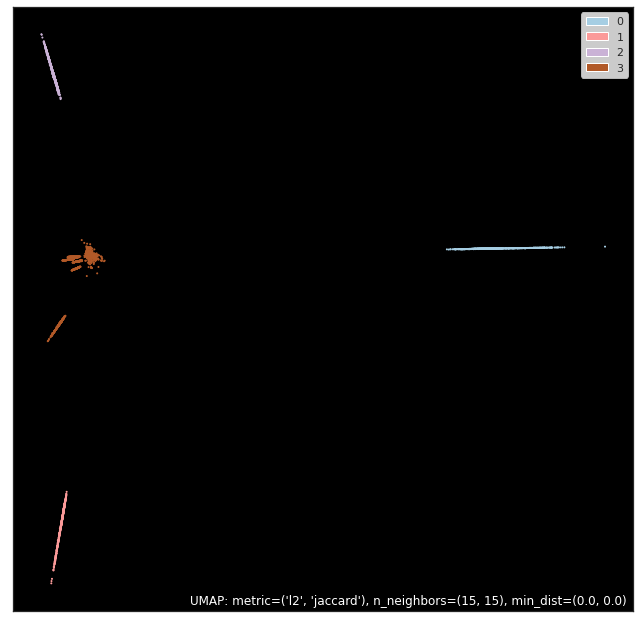

In [25]:
clf.plot_2d_labels()

In [26]:
clf.cluster_summary(results.drop(to_drop, axis = 1), metric = "mean", include_cat = True)

,data_prop,data_count,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Region,Country,Item Type,Sales Channel,Order Priority
3,0.6528,6528,5027.009191,211.973647,142.061417,1.059554e+06,7.099833e+05,349571.151711,Sub-Saharan Africa,Seychelles,Baby Food,Online,C
2,0.1712,1712,4939.875000,659.929334,513.501180,3.260112e+06,2.536443e+06,723669.138400,Europe,Nigeria,Household,Online,"[C, L]"
0,0.0888,888,4958.138514,81.730000,56.670000,4.052287e+05,2.809777e+05,124250.951149,Europe,Nepal,Personal Care,Online,H
1,0.0872,872,4991.227064,109.280000,35.840000,5.454413e+05,1.788856e+05,366555.715596,Europe,"[Cambodia, Kenya]",Clothes,Offline,C


In [27]:
numerics_cols = results.select_dtypes(include = [int, float]).drop(["Cluster"], 1).columns.tolist()

cat_cols = results.select_dtypes(exclude = ["float", "int", "datetime"]).columns.tolist()


In [28]:
columns_analyze_numerical = [c for c in numerics_cols if c not in to_drop]

columns_analyze_categorical = [c for c in cat_cols if c not in to_drop]

clf.describe_cluster(results_df = results, clusters = [0, 1],
                    columns_analyze_numerical = columns_analyze_numerical,
                    columns_analyze_categorical = columns_analyze_categorical, 
                    metric = "mean")

Analysis of cluster 0:
The cluster 0 has 888 rows (8.88% of total).
The average Units Sold in the dataset is 5002.86 and in the cluster 0 is 4958.14 (-0.9%).
The average Unit Price in the dataset is 268.14 and in the cluster 0 is 81.73 (-69.5%).
The average Unit Cost in the dataset is 188.81 and in the cluster 0 is 56.67 (-70.0%).
The average Total Revenue in the dataset is 1333355.13 and in the cluster 0 is 405228.66 (-69.6%).
The average Total Cost in the dataset is 938265.78 and in the cluster 0 is 280977.71 (-70.1%).
The average Total Profit in the dataset is 395089.35 and in the cluster 0 is 124250.95 (-68.6%).
The most common value of the column Region in the dataset is Europe (26.3%) and in the cluster 0 is Europe (27.1%).
The most common value of the column Country in the dataset is United Kingdom (0.7%) and in the cluster 0 is Nepal (1.1%).
The most common value of the column Item Type in the dataset is Personal Care (8.9%) and in the cluster 0 is Personal Care (100.0%).
The m

In [29]:
import seaborn as sns
from matplotlib.pyplot import figure

<AxesSubplot:xlabel='Cluster', ylabel='Total Revenue'>

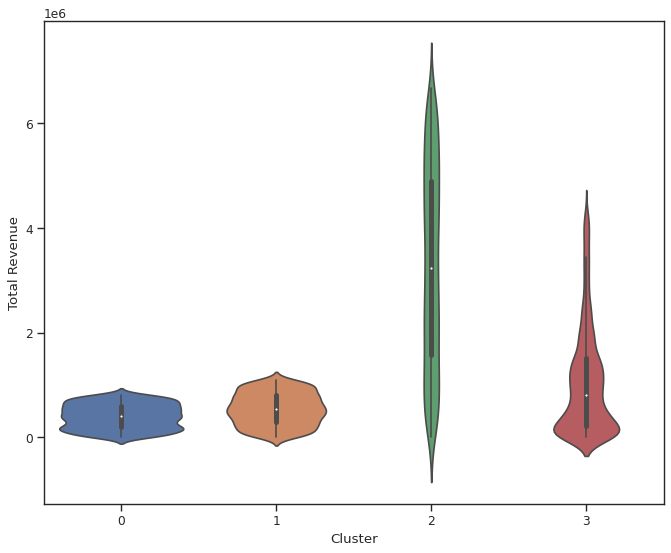

In [30]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Total Revenue", data = results)

<AxesSubplot:xlabel='Cluster', ylabel='Total Revenue'>

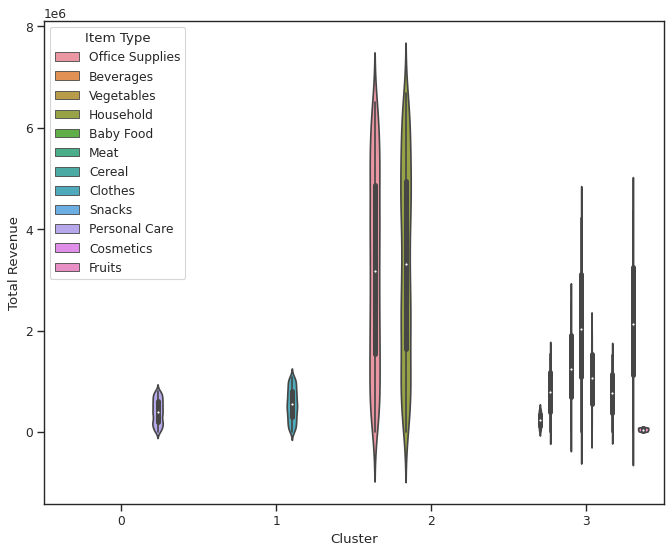

In [31]:
figure(figsize = (10, 8), dpi = 80)
sns.violinplot(x = "Cluster", y = "Total Revenue", data = results, hue = "Item Type")

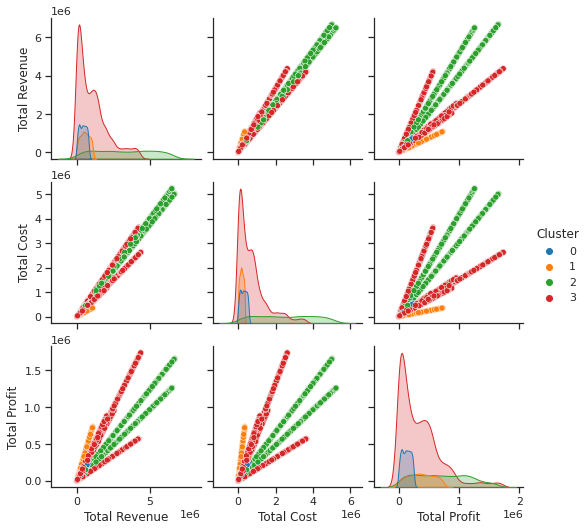

In [32]:
sns.set_theme(style = "ticks")

sns.pairplot(results[["Cluster", "Total Revenue", "Total Cost", "Total Profit"]], hue = "Cluster", palette = "tab10")